In [2]:
import torch
import numpy as np
from PIL import Image
import torchvision.transforms as T
import os
import pandas as pd
from tqdm import tqdm
import glob

# 设置设备
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 加载模型
def load_model():
    model = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=True)
    model.classifier[1] = torch.nn.Linear(in_features=model.classifier[1].in_features, out_features=10)
    
    model.to(device)
    model.eval()
    return model

# 图像预处理
def preprocess_image(image_path):
    transform = T.Compose([
        T.Resize(224),
        T.CenterCrop(224),
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    
    try:
        image = Image.open(image_path)
        if not image.mode == "RGB":
            image = image.convert("RGB")
        return transform(image).unsqueeze(0)  # 添加批次维度
    except Exception as e:
        print(f"无法处理图片 {image_path}: {e}")
        return None

# 预测函数
def predict_aesthetic_score(model, image_path):
    # 加载并预处理图像
    img_tensor = preprocess_image(image_path)
    if img_tensor is None:
        return None, None
    
    img_tensor = img_tensor.to(device)
    
    # 使用模型预测
    with torch.no_grad():
        prediction = model(img_tensor)
    
    # 计算加权分数 (1-10分)
    score_weights = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], device=device, dtype=torch.float)
    mean_score = torch.sum(prediction * score_weights, dim=1).cpu().item()
    
    # 获取分数分布
    score_distribution = prediction.cpu().numpy()[0]
    
    return mean_score, score_distribution

# 提取图片序号的函数
def extract_image_number(file_path):
    # 提取文件名（不含扩展名）
    file_name = os.path.basename(file_path)
    file_name_no_ext = os.path.splitext(file_name)[0]
    
    # 尝试提取数字部分
    try:
        # 提取文件名中的所有数字
        num = ''.join(filter(str.isdigit, file_name_no_ext))
        return int(num) if num else 0
    except:
        return 0

# 批量处理图片
def batch_process_images(image_folder, output_excel):
    # 加载模型
    model = load_model()
    
    # 获取所有图片文件
    image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.bmp', '*.gif']
    image_files = []
    
    for ext in image_extensions:
        image_files.extend(glob.glob(os.path.join(image_folder, ext)))
    
    # 按序号排序图片
    image_files.sort(key=extract_image_number)
    
    # 创建存储结果的列表
    results = []
    
    # 处理每张图片
    for img_path in tqdm(image_files, desc="处理图片"):
        file_name = os.path.basename(img_path)
        score, distribution = predict_aesthetic_score(model, img_path)
        
        if score is not None:
            results.append({
                '文件名': file_name,
                '审美评分': score,
                '分布': str(distribution.tolist())
            })
            print(f"图片 {file_name} 评分: {score:.2f}/10")
    
    # 创建DataFrame并保存到Excel
    df = pd.DataFrame(results)
    df.to_excel(output_excel, index=False)
    print(f"评分结果已保存到 {output_excel}")



In [ ]:
if __name__ == "__main__":
    # 图片文件夹路径
    image_folder = r"XXXXXXXXXXXXXXXXXXXXXXX"
    
    # Excel输出文件路径
    output_excel = r"XXXXXXXXXXXXXXXXXXXXXXXXXXX"
    
    # 处理图片并保存结果
    batch_process_images(image_folder, output_excel)

Using cache found in C:\Users\12150/.cache\torch\hub\pytorch_vision_v0.10.0
处理图片:  27%|██▋       | 6/22 [00:00<00:00, 25.29it/s]

图片 849.jpg 评分: 15.43/10
图片 850.jpg 评分: 7.47/10
图片 851.jpg 评分: 7.25/10
图片 852.jpg 评分: 12.90/10
图片 853.jpg 评分: 10.65/10
图片 854.jpg 评分: 2.98/10


处理图片:  55%|█████▍    | 12/22 [00:00<00:00, 25.31it/s]

图片 855.jpg 评分: 2.38/10
图片 856.jpg 评分: 3.14/10
图片 857.jpg 评分: 7.40/10
图片 858.jpg 评分: 6.98/10
图片 859.jpg 评分: 8.71/10
图片 860.jpg 评分: 2.57/10


处理图片:  82%|████████▏ | 18/22 [00:00<00:00, 24.76it/s]

图片 861.jpg 评分: 9.81/10
图片 862.jpg 评分: 8.66/10
图片 863.jpg 评分: 6.11/10
图片 864.jpg 评分: 15.49/10
图片 865.jpg 评分: 13.93/10
图片 866.jpg 评分: 16.10/10


处理图片: 100%|██████████| 22/22 [00:00<00:00, 24.85it/s]

图片 867.jpg 评分: 12.07/10
图片 868.jpg 评分: 5.16/10
图片 869.jpg 评分: 10.62/10
图片 870.jpg 评分: 9.73/10
评分结果已保存到 C:\Users\12150\OneDrive\Desktop\NIMA.xlsx


C:\Users\12150\AppData\Local\Temp\ipykernel_15336\1974296043.py:41: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\12150\AppData\Local\Temp\ipykernel_15336\1974296043.py:41: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\12150\AppData\Local\Temp\ipykernel_15336\1974296043.py:41: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\12150\AppData\Local\Temp\ipykernel_15336\1974296043.py:41: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\12150\AppData\Local\Temp\ipykernel_15336\1974296043.py:41: UserWarning: Glyph 29255 (\N{CJK UNIFIED IDEOGRAPH-7247}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\12150\AppData\Local\Temp\ipykernel_15336\1974296043.py:41: UserWarning: Glyph 25968 (\

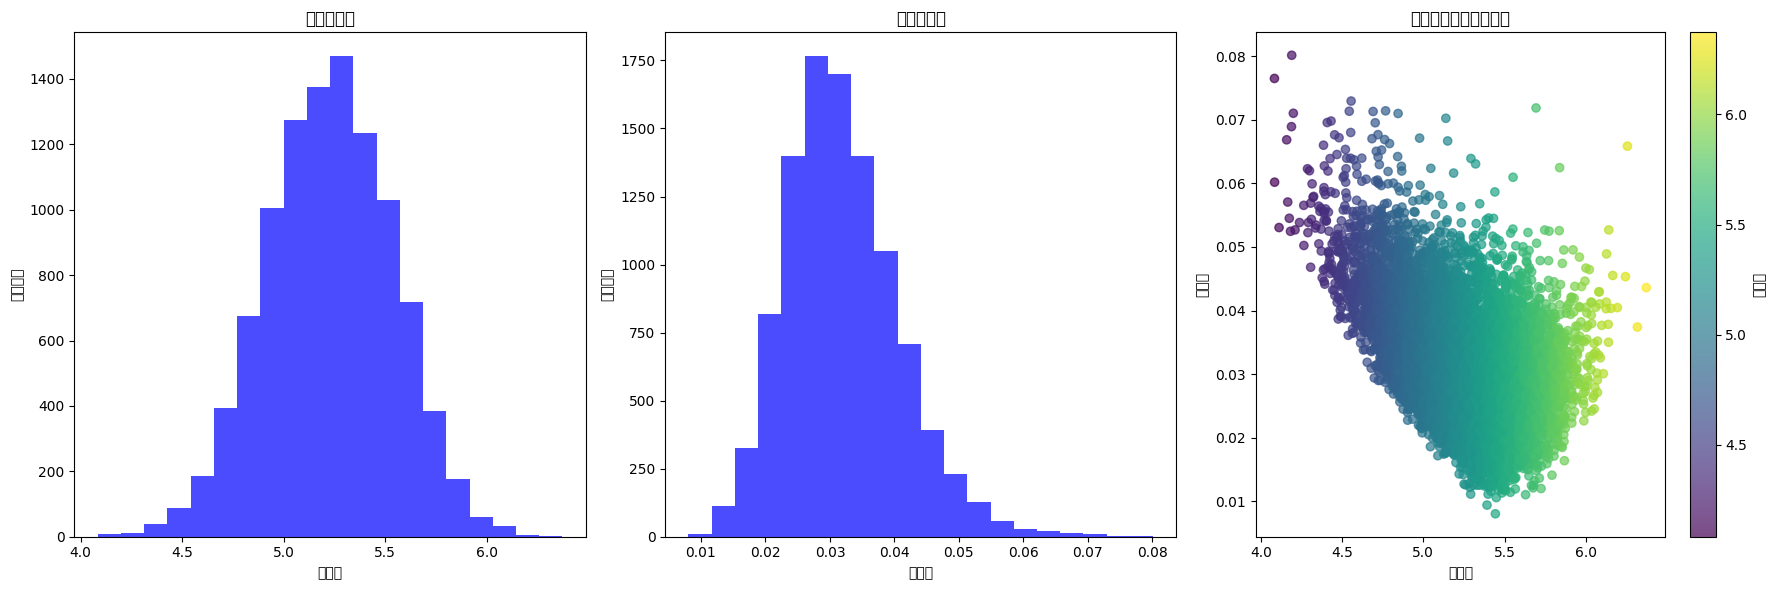

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 读取之前保存的Excel文件
file_path = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'  # 替换为你的输出文件路径  
df = pd.read_excel(file_path)

# 计算标准差
df['分布'] = df['分布'].apply(lambda x: eval(x))
df['标准差'] = df['分布'].apply(lambda x: np.std(np.array(x)))

mean_scores = df['审美评分'].values
std_scores = df['标准差'].values

# 创建图表
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 左图：平均分直方图
axs[0].hist(mean_scores, bins=20, color='blue', alpha=0.7)
axs[0].set_title('平均分分布', fontsize=12)
axs[0].set_xlabel('平均分', fontsize=10)
axs[0].set_ylabel('图片数量', fontsize=10)
axs[0].grid(False)

# 中间图：标准差直方图
axs[1].hist(std_scores, bins=20, color='blue', alpha=0.7)
axs[1].set_title('标准差分布', fontsize=12)
axs[1].set_xlabel('标准差', fontsize=10)
axs[1].set_ylabel('图片数量', fontsize=10)
axs[1].grid(False)

# 右图：联合直方图
sc = axs[2].scatter(mean_scores, std_scores, c=mean_scores, cmap='viridis', alpha=0.7)
axs[2].set_title('平均分与标准差的关系', fontsize=12)
axs[2].set_xlabel('平均分', fontsize=10)
axs[2].set_ylabel('标准差', fontsize=10)
cbar = plt.colorbar(sc, ax=axs[2])
cbar.set_label('平均分', fontsize=10)

plt.tight_layout()
plt.show()
plt.savefig('statistical_charts.png', dpi=300, bbox_inches='tight')